# Top 10k pages data

We're running the top 10k pages from analytics.usa.gov for the last 30 days through the CrUX API to get page-level information.

In [17]:
"""
Loads result to dataframe and analyzes the results
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
from format_urls.load_results_to_dataframe import load_results_to_dataframe

notebook_dir = os.getcwd()

In [18]:
site_scanning = load_results_to_dataframe(
    file_name="data/site-scanning-weekly-snapshot-20240828.csv",
    notebook_dir=notebook_dir,
)

top_10k = load_results_to_dataframe(
    file_name="data/top-10000-pages-and-screens-30-days-20240828.csv",
    notebook_dir=notebook_dir,
)

top_10k["url"] = top_10k.apply(
    lambda row: "https://" + str(row["domain"]) + str(row["pagePath"]), axis=1
)

top_10k.head()

,page_title,domain,pagePath,pageviews,url
0,National Institute of Standards and Technology...,www.time.gov,/,71938105,https://www.time.gov/
1,National Institute of Standards and Technology...,time.gov,/,66873558,https://time.gov/
2,NWS Radar,radar.weather.gov,/,12205408,https://radar.weather.gov/
3,USPS.com® - USPS Tracking® Results,tools.usps.com,/go/trackconfirmaction,12093137,https://tools.usps.com/go/trackconfirmaction
4,Search Public Sex Offender Registries | Dru Sj...,www.nsopw.gov,/search-public-sex-offender-registries,11036250,https://www.nsopw.gov/search-public-sex-offend...


In [19]:
common_urls = pd.merge(site_scanning, top_10k, left_on="final_url", right_on="url")
common_urls.drop_duplicates(subset="url", keep="first", inplace=True)
common_urls.head()

,target_url,target_url_domain,target_url_top_level_domain,target_url_redirects,final_url,final_url_domain,final_url_top_level_domain,final_url_website,final_url_live,final_url_status_code,...,uswds_string,uswds_string_in_css,uswds_semantic_version,uswds_version,uswds_count,page_title,domain,pagePath,pageviews,url
0,fec.gov,fec.gov,.gov,True,https://www.fec.gov/,fec.gov,gov,www.fec.gov,True,200,...,0,0,NaN,0,40,Home | FEC,www.fec.gov,/,1654,https://www.fec.gov/
1,monahrq.ahrq.gov,ahrq.gov,.gov,True,https://www.ahrq.gov/,ahrq.gov,gov,www.ahrq.gov,True,200,...,0,20,NaN,0,100,Home | Agency for Healthcare Research and Quality,www.ahrq.gov,/,689,https://www.ahrq.gov/
2,www.spoc.spaceforce.mil,spaceforce.mil,.mil,False,https://www.spoc.spaceforce.mil/,spaceforce.mil,mil,www.spoc.spaceforce.mil,True,200,...,0,0,NaN,0,0,Home,www.spoc.spaceforce.mil,/,666,https://www.spoc.spaceforce.mil/
3,www.fema.gov,fema.gov,.gov,False,https://www.fema.gov/,fema.gov,gov,www.fema.gov,True,200,...,39,20,NaN,0,166,Home | FEMA.gov,www.fema.gov,/,26228,https://www.fema.gov/
4,redirector.nlm.nih.gov,nih.gov,.gov,True,https://www.nlm.nih.gov/,nih.gov,gov,www.nlm.nih.gov,True,200,...,11,20,NaN,0,151,National Library of Medicine - National Instit...,www.nlm.nih.gov,/,3054,https://www.nlm.nih.gov/


In [20]:
print(
    f"There are {len(common_urls)} urls from the site scanning "
    f"report that also appear in the top-10000 pages and screens report from analytics.usa.gov."
)

There are 447 urls from the site scanning report that also appear in the top-10000 pages and screens report from analytics.usa.gov.


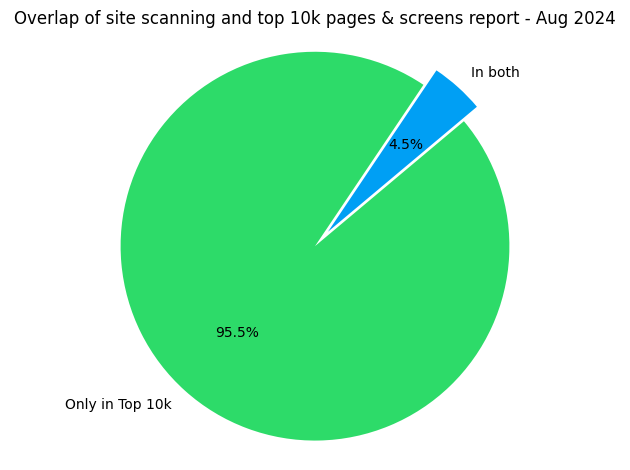

In [31]:
common_count = len(common_urls)
total_count = top_10k["url"].count()
non_common_count = total_count - common_count

labels = ["In both", "Only in Top 10k"]
sizes = [common_count, non_common_count]
explode = (0.1, 0)  # explode the 1st slice

# #942ddb, #725ffc, #2588fe, #009ff4, #00bbdf, #00d2ad, #2ddb69
fig1, ax1 = plt.subplots()
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#009ff4", "#2ddb69"],
    shadow=False,
    startangle=40,
)
ax1.axis("equal")

plt.title(
    "Overlap of site scanning and top 10k pages & screens report - Aug 2024",
)

# plt.tight_layout()
# plt.savefig("./static/overlap-btw-site-scan-and-top-10k.png", dpi=300)
plt.show()

In [22]:
distinct_domains = top_10k["domain"].unique()
print(
    f"There are {len(distinct_domains)} distinct domains in the top 10k pages report."
)

There are 1253 distinct domains in the top 10k pages report.


In [23]:
crux_sample = load_results_to_dataframe(
    file_name="data/sampled-crux-data-20240828.csv",
    notebook_dir=notebook_dir,
)

crux_sample = crux_sample.dropna(subset=["largest_contentful_paint"])
crux_sample.head(5000)

,page_title,domain,pagePath,pageviews,url,time_to_first_byte,first_contentful_paint,largest_contentful_paint,cumulative_layout_shift,interaction_to_next_paint
0,Diabetes - Search Results - PubMed,pubmed.ncbi.nlm.nih.gov,/,922,https://pubmed.ncbi.nlm.nih.gov/,973.0,1312.0,1397.0,0.05,243.0
1,Live | The White House,www.whitehouse.gov,/live/,17294,https://www.whitehouse.gov/live/,385.0,1073.0,1733.0,0.00,153.0
2,NWS Radar,radar.weather.gov,/station/kfsx/standard,1752,https://radar.weather.gov/station/kfsx/standard,154.0,531.0,1402.0,0.01,112.0
3,Military | USCIS,www.uscis.gov,/military/military,1930,https://www.uscis.gov/military/military,298.0,845.0,1287.0,0.03,131.0
4,Important Visa Information - U.S. Embassy and ...,ng.usembassy.gov,/visas/important-visa-information/,2882,https://ng.usembassy.gov/visas/important-visa-...,1833.0,2601.0,3257.0,0.30,259.0
...,...,...,...,...,...,...,...,...,...,...
1400,NASA Citizen Scientists Spot Object Moving 1 M...,science.nasa.gov,/get-involved/citizen-science/nasa-citizen-sci...,2496,https://science.nasa.gov/get-involved/citizen-...,414.0,1146.0,1129.0,0.00,91.0
1401,"Storm Prediction Center Aug 12, 2024 1630 UTC ...",www.spc.noaa.gov,/products/outlook/day1otlk.html,16285,https://www.spc.noaa.gov/products/outlook/day1...,188.0,548.0,735.0,0.02,313.0
1402,Search Results | InertFinder | Pesticides | US...,ordspub.epa.gov,/ords/pesticides/f,4750,https://ordspub.epa.gov/ords/pesticides/f,2989.0,4811.0,4616.0,0.00,147.0
1403,Southern Region Headquarters,www.weather.gov,/srh/,852,https://www.weather.gov/srh/,815.0,1371.0,1546.0,0.04,402.0


In [24]:
lcp = crux_sample["largest_contentful_paint"] > 2500
cls = crux_sample["cumulative_layout_shift"] > 0.1
inp = crux_sample["interaction_to_next_paint"] > 200

# Filter the dataframe
some_pass = crux_sample[lcp | cls | inp]
some_pass.head(5000)

,page_title,domain,pagePath,pageviews,url,time_to_first_byte,first_contentful_paint,largest_contentful_paint,cumulative_layout_shift,interaction_to_next_paint
0,Diabetes - Search Results - PubMed,pubmed.ncbi.nlm.nih.gov,/,922,https://pubmed.ncbi.nlm.nih.gov/,973.0,1312.0,1397.0,0.05,243.0
4,Important Visa Information - U.S. Embassy and ...,ng.usembassy.gov,/visas/important-visa-information/,2882,https://ng.usembassy.gov/visas/important-visa-...,1833.0,2601.0,3257.0,0.30,259.0
5,Log in / NCBI,account.ncbi.nlm.nih.gov,/,24312,https://account.ncbi.nlm.nih.gov/,3613.0,4410.0,4285.0,0.00,404.0
6,Government auctions of seized and surplus prop...,www.usa.gov,/auctions-and-sales,1359,https://www.usa.gov/auctions-and-sales,378.0,686.0,854.0,0.00,246.0
7,"Storm Prediction Center Aug 14, 2024 2000 UTC ...",www.spc.noaa.gov,/products/outlook/day1otlk.html,29356,https://www.spc.noaa.gov/products/outlook/day1...,188.0,548.0,735.0,0.02,313.0
...,...,...,...,...,...,...,...,...,...,...
1397,"Storm Prediction Center Aug 7, 2024 0600 UTC D...",www.spc.noaa.gov,/products/outlook/day1otlk.html,36665,https://www.spc.noaa.gov/products/outlook/day1...,188.0,548.0,735.0,0.02,313.0
1399,No items found - ClinVar - NCBI,www.ncbi.nlm.nih.gov,/clinvar/,34601,https://www.ncbi.nlm.nih.gov/clinvar/,2106.0,3254.0,3602.0,0.19,435.0
1401,"Storm Prediction Center Aug 12, 2024 1630 UTC ...",www.spc.noaa.gov,/products/outlook/day1otlk.html,16285,https://www.spc.noaa.gov/products/outlook/day1...,188.0,548.0,735.0,0.02,313.0
1402,Search Results | InertFinder | Pesticides | US...,ordspub.epa.gov,/ords/pesticides/f,4750,https://ordspub.epa.gov/ords/pesticides/f,2989.0,4811.0,4616.0,0.00,147.0


In [25]:
none_pass = crux_sample[lcp & cls & inp]
none_pass.head(5000)

,page_title,domain,pagePath,pageviews,url,time_to_first_byte,first_contentful_paint,largest_contentful_paint,cumulative_layout_shift,interaction_to_next_paint
4,Important Visa Information - U.S. Embassy and ...,ng.usembassy.gov,/visas/important-visa-information/,2882,https://ng.usembassy.gov/visas/important-visa-...,1833.0,2601.0,3257.0,0.30,259.0
40,ttn[gene] - ClinVar - NCBI,www.ncbi.nlm.nih.gov,/clinvar,674,https://www.ncbi.nlm.nih.gov/clinvar,1728.0,2204.0,2680.0,0.14,407.0
73,Weather Prediction Center (WPC) Home Page,www.wpc.ncep.noaa.gov,/index.php,717,https://www.wpc.ncep.noaa.gov/index.php,408.0,924.0,2645.0,0.28,368.0
80,Lenders Handbook - VA Pamphlet 26-7 - Web Auto...,benefits.va.gov,/warms/pam26_7.asp,793,https://benefits.va.gov/warms/pam26_7.asp,711.0,2408.0,2561.0,0.11,370.0
95,U.S. Embassy in Côte d'Ivoire - Homepage,ci.usembassy.gov,/,1364,https://ci.usembassy.gov/,3090.0,3690.0,4493.0,0.69,277.0
...,...,...,...,...,...,...,...,...,...,...
1320,Occupational Safety and Health Administration,www.osha.gov,/publications/bytype/popular-downloads,3577,https://www.osha.gov/publications/bytype/popul...,1622.0,2653.0,2756.0,0.15,206.0
1356,2025 Mandela Washington Fellowship - U.S. Emba...,ci.usembassy.gov,/2025-mandela-washington-fellowship/,1620,https://ci.usembassy.gov/2025-mandela-washingt...,2512.0,4165.0,4721.0,0.28,394.0
1387,SAM.gov,sam.gov,/reports/awards/standard,1174,https://sam.gov/reports/awards/standard,265.0,2581.0,2872.0,0.21,333.0
1393,Don't Pollute Yourself - The Real Cost,therealcost.betobaccofree.hhs.gov,/vapes/dont-pollute-yourself,10708,https://therealcost.betobaccofree.hhs.gov/vape...,954.0,1815.0,2604.0,0.11,282.0


In [26]:
good_lcp = crux_sample["largest_contentful_paint"] <= 2500
good_cls = crux_sample["cumulative_layout_shift"] <= 0.1
good_inp = crux_sample["interaction_to_next_paint"] <= 200
# Filter the dataframe with the updated conditions
all_pass = crux_sample[good_lcp & good_cls & good_inp]
all_pass.head(5000)

,page_title,domain,pagePath,pageviews,url,time_to_first_byte,first_contentful_paint,largest_contentful_paint,cumulative_layout_shift,interaction_to_next_paint
1,Live | The White House,www.whitehouse.gov,/live/,17294,https://www.whitehouse.gov/live/,385.0,1073.0,1733.0,0.00,153.0
2,NWS Radar,radar.weather.gov,/station/kfsx/standard,1752,https://radar.weather.gov/station/kfsx/standard,154.0,531.0,1402.0,0.01,112.0
3,Military | USCIS,www.uscis.gov,/military/military,1930,https://www.uscis.gov/military/military,298.0,845.0,1287.0,0.03,131.0
10,ROME Survey Page | SSA,www.ssa.gov,/myaccount/lp/landing-page-rome.html,18806,https://www.ssa.gov/myaccount/lp/landing-page-...,167.0,708.0,843.0,0.00,70.0
17,"From August 1, 2024, Onward: Entry Requirement...",www.cdc.gov,/importation/dogs/foreign-vaccinated-high-risk...,710,https://www.cdc.gov/importation/dogs/foreign-v...,508.0,1023.0,1024.0,0.00,105.0
...,...,...,...,...,...,...,...,...,...,...
1390,Medical Devices | FDA,www.fda.gov,/medical-devices,8066,https://www.fda.gov/medical-devices,371.0,983.0,1134.0,0.00,113.0
1396,NWS Radar,radar.weather.gov,/station/kmvx/standard,1051,https://radar.weather.gov/station/kmvx/standard,175.0,575.0,1413.0,0.00,142.0
1398,Local Standards: Housing and Utilities | Inter...,www.irs.gov,/businesses/small-businesses-self-employed/loc...,658,https://www.irs.gov/businesses/small-businesse...,341.0,491.0,509.0,0.00,112.0
1400,NASA Citizen Scientists Spot Object Moving 1 M...,science.nasa.gov,/get-involved/citizen-science/nasa-citizen-sci...,2496,https://science.nasa.gov/get-involved/citizen-...,414.0,1146.0,1129.0,0.00,91.0


In [27]:
some_pass_domain_group = some_pass.groupby("domain").describe()
some_pass_domain_group.head(5000)

pageviews                                       \
                             count          mean           std      min   
domain                                                                    
1950census.archives.gov        1.0   6647.000000           NaN   6647.0   
aad.archives.gov              10.0   3453.900000   2340.473525    694.0   
about.usps.com                 5.0  20704.400000  30930.625007    764.0   
account.ncbi.nlm.nih.gov       2.0  13517.500000  15265.728299   2723.0   
ae.usembassy.gov               1.0   2066.000000           NaN   2066.0   
...                            ...           ...           ...      ...   
www.wpc.ncep.noaa.gov          3.0   6365.333333   7743.239524    717.0   
www.wrh.noaa.gov               1.0  35136.000000           NaN  35136.0   
www3.nasa.gov                  2.0   1440.500000     10.606602   1433.0   
yali.state.gov                 2.0   1150.000000    356.381818    898.0   
za.usembassy.gov               2.0   1072.000000    393.151370    794.0   

                                                                \
                               25%      50%       75%      max   
domain                                                           
1950census.archives.gov    6647.00   6647.0   6647.00   6647.0   
aad.archives.gov           2787.25   3278.5   3494.75   9226.0   
about.usps.com             1007.00  12917.0  13954.00  74880.0   
account.ncbi.nlm.nih.gov   8120.25  13517.5  18914.75  24312.0   
ae.usembassy.gov           2066.00   2066.0   2066.00   2066.0   
...                            ...      ...       ...      ...   
www.wpc.ncep.noaa.gov      1952.00   3187.0   9189.50  15192.0   
www.wrh.noaa.gov          35136.00  35136.0  35136.00  35136.0   
www3.nasa.gov              1436.75   1440.5   1444.25   1448.0   
yali.state.gov             1024.00   1150.0   1276.00   1402.0   
za.usembassy.gov            933.00   1072.0   1211.00   1350.0   

                         time_to_first_byte          ...  \
                                      count    mean  ...   
domain                                               ...   
1950census.archives.gov                 1.0   365.0  ...   
aad.archives.gov                       10.0   265.8  ...   
about.usps.com                          5.0   319.2  ...   
account.ncbi.nlm.nih.gov                2.0  2771.5  ...   
ae.usembassy.gov                        1.0  2258.0  ...   
...                                     ...     ...  ...   
www.wpc.ncep.noaa.gov                   3.0   445.0  ...   
www.wrh.noaa.gov                        1.0   679.0  ...   
www3.nasa.gov                           2.0  1842.0  ...   
yali.state.gov                          2.0  3190.5  ...   
za.usembassy.gov                        2.0  1953.5  ...   

                         cumulative_layout_shift        \
                                             75%   max   
domain                                                   
1950census.archives.gov                   0.0100  0.01   
aad.archives.gov                          0.0000  0.00   
about.usps.com                            0.0000  0.00   
account.ncbi.nlm.nih.gov                  0.0000  0.00   
ae.usembassy.gov                          0.9100  0.91   
...                                          ...   ...   
www.wpc.ncep.noaa.gov                     0.2550  0.28   
www.wrh.noaa.gov                          0.0100  0.01   
www3.nasa.gov                             0.0000  0.00   
yali.state.gov                            0.9175  1.11   
za.usembassy.gov                          0.4050  0.45   

                         interaction_to_next_paint                         \
                                             count        mean        std   
domain                                                                      
1950census.archives.gov                        1.0  238.000000        NaN   
aad.archives.gov                              10.0  325.900000   8.569325   
about.usps

In [28]:
none_pass_domain_group = none_pass.groupby("domain").describe()
none_pass_domain_group.head(5000)

pageviews                              \
                                      count          mean           std   
domain                                                                    
ae.usembassy.gov                        1.0   2066.000000           NaN   
benefits.va.gov                         1.0    793.000000           NaN   
catalog.archives.gov                    1.0   3216.000000           NaN   
ci.usembassy.gov                        3.0   1310.666667    339.159746   
clinicaltrials.gov                      1.0   3747.000000           NaN   
co.usembassy.gov                        1.0   4238.000000           NaN   
collegescorecard.ed.gov                 2.0   1149.000000    642.052957   
data.census.gov                         4.0   1693.750000   1161.895111   
eservices.archives.gov                  3.0   2555.333333   2613.630872   
giovanni.gsfc.nasa.gov                  1.0   3307.000000           NaN   
hn.usembassy.gov                        1.0   1644.000000           NaN   
hts.usitc.gov                           1.0   7994.000000           NaN   
ke.usembassy.gov                        1.0   1402.000000           NaN   
kr.usembassy.gov                        1.0    751.000000           NaN   
lb.usembassy.gov                        1.0    837.000000           NaN   
mx.usembassy.gov                        1.0   4341.000000           NaN   
ng.usembassy.gov                        2.0   1859.000000   1446.740474   
phil.cdc.gov                            1.0   4252.000000           NaN   
pk.usembassy.gov                        1.0   1911.000000           NaN   
portal.consumerfinance.gov              2.0  11384.000000   3140.968322   
reportfraud.ftc.gov                     1.0   5311.000000           NaN   
sa.usembassy.gov                        1.0    744.000000           NaN   
sam.gov                                 1.0   1174.000000           NaN   
seasonaljobs.dol.gov                    2.0  11774.500000  12211.027004   
studentaid.gov                          7.0   9348.000000  13815.399246   
support.nlm.nih.gov                     1.0   1199.000000           NaN   
therealcost.betobaccofree.hhs.gov       1.0  10708.000000           NaN   
www.cisa.gov                            1.0   2837.000000           NaN   
www.cuidadodesalud.gov                  1.0  10959.000000           NaN   
www.myhealth.va.gov                     1.0   1675.000000           NaN   
www.ncbi.nlm.nih.gov                    6.0   6917.000000  13587.892434   
www.nlm.nih.gov                         1.0   3054.000000           NaN   
www.oig.dhs.gov                         1.0   1289.000000           NaN   
www.osha.gov                            1.0   3577.000000           NaN   
www.va.gov                              5.0  31306.800000  48373.753180   
www.weather.gov                         1.0   1181.000000           NaN   
www.wpc.ncep.noaa.gov                   2.0   7954.500000  10235.370658   
yali.state.gov                          2.0   1150.000000    356.381818   
za.usembassy.gov                        2.0   1072.000000    393.151370   

                                                                         \
                                       min       25%      50%       75%   
domain                                                                    
ae.usembassy.gov                    2066.0   2066.00   2066.0   2066.00   
benefits.va.gov                      793.0    793.00    793.0    793.00   
catalog.archives.gov                3216.0   3216.00   3216.0   3216.00   
ci.usembassy.gov                     948.0   1156.00   1364.0   1492.00   
clinicaltrials.gov                  3747.0   3747.00   3747.0   3747.00   
co.usembassy.gov                    4238.0   4238.00   4238.0   4238.00   
collegescorecard.ed.gov              695.0    922.00   1149.0   1376.00   
data.census.gov                      889.0    901.75   1263.0   2055.00   
eservices.archives.gov              1010.0   1046.50   108

In [29]:
all_pass_domain_group = all_pass.groupby("domain").describe()
all_pass_domain_group.head(5000)

pageviews                                           \
                          count     mean           std      min      25%   
domain                                                                     
2009-2017.state.gov         1.0   1385.0           NaN   1385.0   1385.0   
acis.eoir.justice.gov       2.0  54411.0  71656.786992   3742.0  29076.5   
ais.usvisa-info.com         1.0    829.0           NaN    829.0    829.0   
americorps.gov              1.0  15582.0           NaN  15582.0  15582.0   
aoprals.state.gov           1.0   4954.0           NaN   4954.0   4954.0   
...                         ...      ...           ...      ...      ...   
www.usps.com                1.0   1575.0           NaN   1575.0   1575.0   
www.uspto.gov               1.0   6285.0           NaN   6285.0   6285.0   
www.whitehouse.gov          2.0  30351.0  18465.386484  17294.0  23822.5   
www2.ed.gov                 1.0    803.0           NaN    803.0    803.0   
wwwnc.cdc.gov               2.0    846.0     22.627417    830.0    838.0   

                                                  time_to_first_byte          \
                           50%      75%       max              count    mean   
domain                                                                         
2009-2017.state.gov     1385.0   1385.0    1385.0                1.0   775.0   
acis.eoir.justice.gov  54411.0  79745.5  105080.0                2.0   467.0   
ais.usvisa-info.com      829.0    829.0     829.0                1.0  1801.0   
americorps.gov         15582.0  15582.0   15582.0                1.0   913.0   
aoprals.state.gov       4954.0   4954.0    4954.0                1.0   736.0   
...                        ...      ...       ...                ...     ...   
www.usps.com            1575.0   1575.0    1575.0                1.0   630.0   
www.uspto.gov           6285.0   6285.0    6285.0                1.0   611.0   
www.whitehouse.gov     30351.0  36879.5   43408.0                2.0   341.5   
www2.ed.gov              803.0    803.0     803.0                1.0   663.0   
wwwnc.cdc.gov            846.0    854.0     862.0                2.0   730.0   

                       ... cumulative_layout_shift        \
                       ...                     75%   max   
domain                 ...                                 
2009-2017.state.gov    ...                    0.00  0.00   
acis.eoir.justice.gov  ...                    0.06  0.06   
ais.usvisa-info.com    ...                    0.00  0.00   
americorps.gov         ...                    0.00  0.00   
aoprals.state.gov      ...                    0.00  0.00   
...                    ...                     ...   ...   
www.usps.com           ...                    0.00  0.00   
www.uspto.gov          ...                    0.10  0.10   
www.whitehouse.gov     ...                    0.00  0.00   
www2.ed.gov            ...                    0.00  0.00   
wwwnc.cdc.gov          ...                    0.00  0.00   

                      interaction_to_next_paint                           \
                                          count   mean        std    min   
domain                                                                     
2009-2017.state.gov                         1.0  146.0        NaN  146.0   
acis.eoir.justice.gov                       2.0  141.0   0.000000  141.0   
ais.usvisa-info.com                         1.0   96.0        NaN   96.0   
americorps.gov                              1.0  104.0        NaN  104.0   
aoprals.state.gov                           1.0   71.0        NaN   71.0   
...                                         ...    ...        ...    ...   
www.usps.com                                1.0  179.0        NaN  179.0   
www.uspto.gov                               1.0  113.0        NaN  113.0   
www.whitehouse.gov                          2.0  131.0  31.112698  109.0   
www2.ed.gov                                 1.0   77.0        NaN   77.0   
wwwnc.c